# Diabetes classification - Supervised ML classification problem

In this notebook, I am applying supervised machine learnign classifications to a diabetic dataset. I aim to conclude whther the tested data has diabetes or not. I will use KNN , decision tree , random forest ,Support vector machine, logistic regression and Naive Bayes algorithms. I will also make evaluation of all the models used by using confusion matrix.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Logistic regression

In [2]:
# loading the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

## Descriptive statistics
This step shows the decriptive statistics of all the numerical columns in the dataset. 

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## EDA
##### Exploratory Data Analysis
This step focuses on exploring throuhg the data to determine the data types, check for missing data point and fix them etc.

In [5]:
# Smmarize the characteristics of the data coluhmns to check for data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Outcome', ylabel='count'>

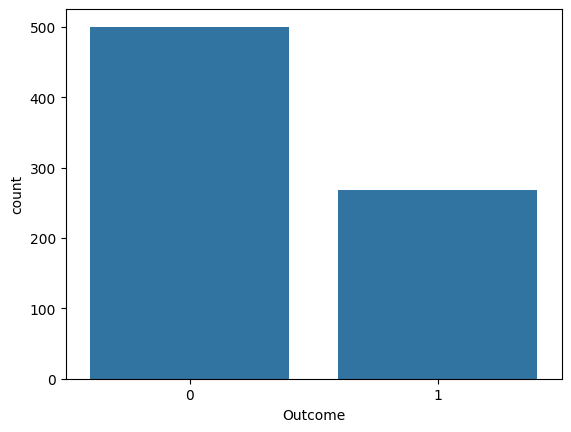

In [6]:
sns.countplot(x="Outcome", data=df)

This chat shows how the Outcomes are classified. There are more Negative outcomes, 0, than postive outcomes, 1. There's not much cleaning to be done on our dataset. We can therefore go directly to the Machine learning processes.

## Machine Learning

In [7]:
#Have the outcome data as y
y = df.Outcome.values

# remove the Outcome data from the dataset and have the remaining as x
x_data = df.drop(['Outcome'], axis=1)

In [8]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y[1:10]

array([0, 1, 0, 1, 0, 1, 0, 1, 1])

In [10]:
#Normalization to handle unbalanced features 
x = (x_data - np.min(x_data))/(np.max(x_data) -np.min(x_data)).values

AttributeError: 'numpy.float64' object has no attribute 'values'

In [ ]:
# Split the data into training and test set. We use 20% test data with a random state of 42 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

## Logistic Regression Classification
Logistic regression is a powerful algorithm when you have a binary classification problem

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print("test accuracy {}".format(lr.score(x_test, y_test)))

lr_score=lr.score(x_test, y_test)

In [ ]:
# using confusion matrix to evaluate the linear regression 
from sklearn.metrics import confusion_matrix

y_prediction = lr.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# heatmap visulization of confusion matrix
f, ax = plt.subplots(figsize =(5, 5))
sns.heatmap(cm, annot = True, linewidth=1, linecolor="green", fmt =".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()            

## KNN Classification
We need to choose a small k value but not too small that it causes overfitting while big k value causes underfitting. The K value we choose needs to be as close to our test points as possible. For this case, we use the standard k value whcih is k=3

In [ ]:
# import KNN classification model
from sklearn.neighbors import KNeighborsClassifier
k=11
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("{} nn score: {}".format(k, knn.score(x_test, y_test)))

knn_score = knn.score(x_test, y_test)

In [ ]:
# testing differnt vaues of k with accuracy to determine the most favorable
# k ranges from 1-15
score_list = []
for each in range(1, 15):
    knn2 = KNeighborsClassifier(n_neighbors= each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))
    
plt.plot(range(1, 15), score_list)
plt.xlabel("kvalues")
plt.ylabel("accuracy")
plt.show()

K=11, 12 gives the best accuracy for our case

In [ ]:
# Confusion matrix
y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual, y_prediction)

# Heatmap visualization of conusion matrix
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot =  True, linewidths=1, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

## Decision Tree Classification
Decision trees builds classification on regression model in the form of tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time asn associated decison tree is incrementaly developed. It can eb used for both binary and multiclass 

In [ ]:
# Decision tree approach
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)

print("score: ", dt.score(x_test, y_test))

dt_score = dt.score(x_test, y_test)

In [ ]:
# confsion matrix
y_prediction = dt.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# heatmap
f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, annot = True, linewidths=1, linecolor="black", fmt =".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

## Random Forest Classification
This approach uses multiple decision trees and take the averge of the results of these decison trees. this average is used to determien the calss of the test points. It is one fo the ensember methods that uses multiple classes to predict the target

In [ ]:
# random forest classification
from sklearn.ensemble import RandomForestClassifier
# set n_estimators to 100 whcih means the model will use 100 subsets
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)
print("random forest model score: ", rf.score(x_test, y_test))
rf_score= rf.score(x_test, y_test)

In [ ]:
# confusion matrix
y_prediction = rf.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# Heatmap
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

## Support Vector Machine(SVM)
SVM is used both for regression and classification problems. The C parameter inside the SVM algorithm has a default value fo 1. If C is kept very small, it can case misclassification, if it is too bigh it can cause overfitting. As a reuslt, differnt C values are tried to get the best value

In [ ]:
# SVM approach
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(x_train, y_train)

print("Accuracy of SVM: ", svm.score(x_test, y_test))

svm_score = svm.score(x_test, y_test)

In [ ]:
# Confusion matrix
y_prediction = svm.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# Heatmap
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

## Naive Bayes Classification
this is a probabilistic classifier whcih applies Bayes theorem with strong independence assumption between the features. It works by determinign similarity range and calculating probability of the X points in the A feature P(A_feature|x)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

print("accuracy of naive bayes: ", nb.score(x_test, y_test))

nb_score = nb.score(x_test, y_test)

In [ ]:
# Confusion matrix
y_prediction = nb.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual, y_prediction)

# heatmap
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor = "green", fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

### Comparision Using Confusion matrix
Below I visualize all confusion matrices to all classifiers

In [ ]:
class_name = ("Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM", "Naive bayes")
class_score = (lr_score, knn_score, dt_score, rf_score, svm_score, nb_score)
y_pos = np.arange(len(class_score))
colors = ("red", "green", "gold","blue", "orange","black")
plt.figure(figsize=(18, 12))
plt.bar(y_pos, class_score, color=colors)
plt.xticks(y_pos, class_name, fontsize=20)
plt.yticks(np.arange(0.00, 1.05, step = 0.05))
plt.ylabel("Accuracy")

plt.title("Confusion Matrix Comparision of Classifiers", fontsize=14)
plt.savefig("graph.png")
plt.show()

## Conclusion
From the past 3 week's posts, we have looked at the theoretical part of classification algorithms, here we have applied the algorithms. Check out for next weeks post. 